In [63]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Regularization

## 1D Nonlinear Function

In [83]:
model_list1 = loader(data_path("sparse_regularisation_model_low_penalty"))
model_list2 = loader(data_path("sparse_no_train_model"))
model_list3 = loader(data_path("sparse_no_train_model_dense"))

In [85]:
loss1 = np.array([model.loss for model in model_list1])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([model.loss for model in model_list2])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([model.loss for model in model_list3])
std3 = np.std(loss3, axis=0)
avg3 = np.mean(loss3, axis=0)

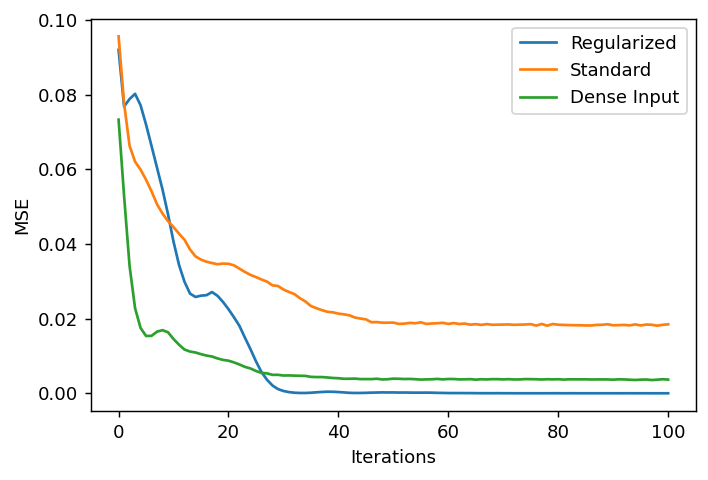

In [87]:
start = 0
stop = 101
alpha = 0.2
spacing1 = list(range(101))
spacing2 = list(range(stop))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(spacing1[start:], (avg1 - std1)[start:], (avg1 + std1)[start:], alpha=alpha)
plt.fill_between(spacing2[start:], (avg2 - std2)[start:stop], (avg2 + std2)[start:stop], alpha=alpha)
plt.fill_between(spacing2[start:], (avg3 - std3)[start:stop], (avg3 + std3)[start:stop], alpha=alpha)
plt.plot(spacing1[start:], avg1[start:])
plt.plot(spacing2[start:], avg2[start:stop])
plt.plot(spacing2[start:], avg3[start:stop])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["Regularized", "Standard", "Dense Input"])
plt.show()

In [88]:
map_params = np.array([model.map_params for model in model_list1])

In [89]:
map_params_avg = np.mean(map_params, axis=0)
map_params_std = np.std(map_params, axis=0)

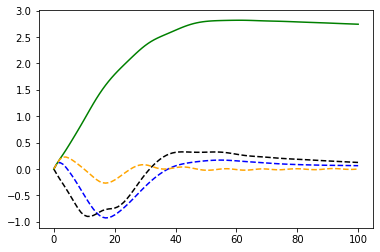

In [90]:
plt.plot(map_params[:,:,0].T, color="blue", linestyle="--")
plt.plot(map_params[:,:,1].T, color="black", linestyle="--")
plt.plot(map_params[:,:,2].T, color="green")
plt.plot(map_params[:,:,3].T, color="orange", linestyle="--")
plt.show()

### Test Data

In [74]:
np.random.seed(42)

n = 200
n_features = 4
epochs = 100
x = np.random.uniform(0, np.pi, (n, n_features))

std = 0.2
y = np.sin(2*x[:,2])
y = scaler(y, a=0.1, b=0.9).reshape(-1, 1)

x_train, y_train = x[:100,:], y[:100,:]
x_test, y_test = x[100:,:], y[100:,:]

In [75]:
loss_list_reg = []
for model in model_list1:
    y_pred = model.predict(x_train)
    loss = np.mean((y_pred - y_train)**2)
    loss_list_reg.append(loss)

loss_reg = np.mean(loss_list_reg)
loss_reg_std = np.std(loss_list_reg)

In [76]:
loss_list_standard = []
for model in model_list2:
    y_pred = model.predict(x_train)
    loss = np.mean((y_pred - y_train)**2)
    loss_list_standard.append(loss)

loss_standard = np.mean(loss_list_standard)
loss_standard_std = np.std(loss_list_standard)

In [77]:
print(f"test loss regularzation: {loss_reg:.6f} +- {loss_reg_std:.6f}")
print(f"test loss standard:      {loss_standard:.6f} +- {loss_standard_std:.6f}")

test loss regularzation: 0.000023 +- 0.000000
test loss standard:      0.018218 +- 0.000000


In [91]:
y_pred1 = model_list1[0].predict(x_train)
y_pred2 = model_list2[0].predict(x_train)

x_train[:,0] = np.pi/2
x_train[:,1] = np.pi/2
x_train[:,3] = np.pi/2
y_pred3 = model_list2[0].predict(x_train)

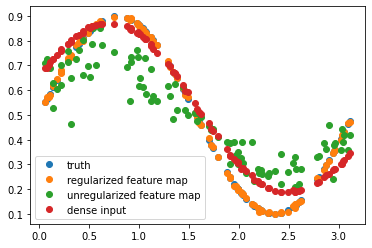

In [94]:
plt.plot(x_train[:,2], y_train, "o")
plt.plot(x_train[:,2], y_pred1, "o")
plt.plot(x_train[:,2], y_pred2, "o")
plt.plot(x_train[:,2], y_pred3, "o")
plt.legend(["truth", "regularized feature map", "unregularized feature map", "dense input"])
plt.show()